<h1 style="text-align:center;font-size:200%;;">Explorative Datenanalyse 📊</h1>

<form action="/action_page.php">
  <fieldset>
    <legend>Aufbau:</legend>
    
   <div class="card">
    <p class="card-text">Beschreibung des Aufbaus der EDA</p>
  
  </div>
</div>
    
  </fieldset>
</form>

### Bibliotheken importieren:

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import pearsonr

<hr class="my-4">

### Daten einlesen:

In [344]:
df_results = pd.read_csv('files/input/results.csv', encoding='utf-8')
df_shootouts = pd.read_csv('files/input/shootouts.csv', encoding='utf-8')
df_goalscorers = pd.read_csv('files/input/goalscorers.csv', encoding='utf-8')
df_fifa_ranking = pd.read_csv('files/input/fifa_ranking-2024-04-04.csv', encoding='utf-8')

<hr class="my-4">

### Dateneinblick:

(Spalten, Datentypen, fehlende Werte / Null-Values, Statistiken)

In [345]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [346]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47126 non-null  object 
 1   home_team   47111 non-null  object 
 2   away_team   47111 non-null  object 
 3   home_score  47075 non-null  float64
 4   away_score  47075 non-null  float64
 5   tournament  47126 non-null  object 
 6   city        47126 non-null  object 
 7   country     47126 non-null  object 
 8   neutral     47126 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [347]:
df_results.isnull().sum()

date           0
home_team     15
away_team     15
home_score    51
away_score    51
tournament     0
city           0
country        0
neutral        0
dtype: int64

In [348]:
df_results.describe()

,home_score,away_score
count,47075.000000,47075.000000
mean,1.761190,1.183452
std,1.776751,1.402597
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [349]:
df_shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [350]:
df_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           636 non-null    object
 1   home_team      636 non-null    object
 2   away_team      636 non-null    object
 3   winner         636 non-null    object
 4   first_shooter  222 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


In [351]:
df_shootouts.isnull().sum()

date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64

In [352]:
df_shootouts.describe()

,date,home_team,away_team,winner,first_shooter
count,636,636,636,636,222
unique,561,180,189,174,85
top,2024-03-26,South Africa,Egypt,South Korea,Colombia
freq,5,18,15,15,11


In [353]:
df_goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [354]:
df_goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [355]:
df_goalscorers.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       263
own_goal       2
penalty        2
dtype: int64

In [356]:
df_goalscorers.describe()

,minute
count,43847.000000
mean,50.015212
std,26.354534
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


<hr class="my-4">

### Datenaufbereitung:

drop values, change data types, fill missing values, fillna, create new columns 

In [357]:
df_results['date'] = pd.to_datetime(df_results['date'])
df_shootouts["date"] = pd.to_datetime(df_shootouts["date"])
df_goalscorers["date"] = pd.to_datetime(df_goalscorers["date"])

 Trendanalysen mit Zeitreihen (Tordifferenz der letzten 5 Spiele)
 Fifascore der letzten 5 Jahre (Trendanalyse abwärts/aufwärts?)
 monetäre Werte? Erwartungswert (Transferdaten)

 Grundlagen, Literaturrecherche (externes Notebook oder mittendrin)^
 Begründung, Warum man was gemacht hat 

In [358]:
# Erstellen von neuen Spalten 'home_score' und 'away_score' für die Heim- und Auswärtstore

dictionary_goalscorer = {}
home_scores = pd.Series(0, index=df_goalscorers.index)
away_scores = pd.Series(0, index=df_goalscorers.index)

for group, df in df_goalscorers.groupby(by=["date", "home_team", "away_team"]):
    for index, row in df.iterrows():
        if group in dictionary_goalscorer.keys():
            if row["team"] == row["home_team"]:
                dictionary_goalscorer[group][0] += 1
                home_scores[index] = dictionary_goalscorer[group][0]
            else:
                dictionary_goalscorer[group][1] += 1
                away_scores[index] = dictionary_goalscorer[group][1]
        else:
            if row["team"] == row["home_team"]:
                dictionary_goalscorer[group] = [1,0]
            else:
                dictionary_goalscorer[group] = [0,1]

            home_scores[index] = dictionary_goalscorer[group][0]
            away_scores[index] = dictionary_goalscorer[group][1]

df_goalscorers_extended = pd.concat([df_goalscorers, home_scores.rename("home_score"), away_scores.rename("away_score")], axis=1)

In [359]:
# Erstellen einer neuen Spalte "winning_country" durch den Vergleich der Heim- und Auswärtstore inklusive "Unentschieden"

df_results['winning_country'] = df_results.apply(lambda x: x['home_team'] if x['home_score'] > x['away_score'] else 'Unentschieden' if x['home_score'] == x['away_score'] else x['away_team'], axis=1)

In [360]:
# Kontinent-Mapping zum Erstellen einer neuen Spalte Kontinent für Heim- und Auswärtsteams

continents = {
    'Afghanistan': 'Asia',
    'Egypt': 'Africa',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Equatorial Guinea': 'Africa',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Azerbaijan': 'Asia',
    'Ethiopia': 'Africa',
    'Australia': 'Oceania',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cayman Islands': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Curaçao': 'North America',
    'Denmark': 'Europe',
    'Germany': 'Europe',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Djibouti': 'Africa',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Ivory Coast': 'Africa',
    'England': 'Europe',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Grenada': 'North America',
    'Greece': 'Europe',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guyana': 'South America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iraq': 'Asia',
    'Iran': 'Asia',
    'Ireland': 'Europe',
    'Iceland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Yemen': 'Asia',
    'Jordan': 'Asia',
    'U.S. Virgin Islands': 'North America',
    'British Virgin Islands': 'North America',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Kazakhstan': 'Asia',
    'Qatar': 'Asia',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Kosovo': 'Europe',
    'Democratic Republic of the Congo': 'Africa',
    'Republic of the Congo': 'Africa',
    'North Korea': 'Asia',
    'South Korea': 'Asia',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Kuwait': 'Asia',
    'Laos': 'Asia',
    'Lesotho': 'Africa',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macau': 'Asia',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Morocco': 'Africa',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Netherlands': 'Europe',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Northern Ireland': 'Europe',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Austria': 'Europe',
    'East Timor': 'Asia',
    'Pakistan': 'Asia',
    'Palestine': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Rwanda': 'Africa',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Solomon Islands': 'Oceania',
    'Zambia': 'Africa',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Scotland': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Zimbabwe': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Somalia': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'South Africa': 'Africa',
    'Sudan': 'Africa',
    'South Sudan': 'Africa',
    'Suriname': 'South America',
    'Syria': 'Asia',
    'Tajikistan': 'Asia',
    'Tahiti': 'Oceania',
    'Taiwan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Chad': 'Africa',
    'Czech Republic': 'Europe',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'Hungary': 'Europe',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'United Arab Emirates': 'Asia',
    'United States': 'North America',
    'Vietnam': 'Asia',
    'Wales': 'Europe',
    'Central African Republic': 'Africa',
    'Cyprus': 'Asia'
}

df_results['home_continent'] = df_results['home_team'].map(continents)
df_results['away_continent'] = df_results['away_team'].map(continents)
df_shootouts['home_continent'] = df_shootouts['home_team'].map(continents)
df_shootouts['away_continent'] = df_shootouts['away_team'].map(continents)

df_results['home_continent'] = df_results['home_continent'].fillna('Country not in Fifa Ranking')
df_results['away_continent'] = df_results['away_continent'].fillna('Country not in Fifa Ranking')
df_shootouts['home_continent'] = df_shootouts['home_continent'].fillna('Country not in Fifa Ranking')
df_shootouts['away_continent'] = df_shootouts['away_continent'].fillna('Country not in Fifa Ranking')

In [361]:
# Erstellen einer neuen Spalte 'winning_continent' durch den Vergleich der Heim- und Auswärtstore inklusive 'Unentschieden'

df_results['winning_continent'] = df_results.apply(lambda x: x['home_continent'] if x['home_score'] > x['away_score'] else 'Unentschieden' if x['home_score'] == x['away_score'] else x['away_continent'], axis=1)
df_shootouts['winning_continent'] = df_shootouts['winner'].map(continents)

In [362]:
# DataFrame mit allen Ländern, die in der Fifa spielen
results_not_in_fifa_ranking = df_results[(df_results['home_continent'] == 'Country not in Fifa Ranking') | (df_results['away_continent'] == 'Country not in Fifa Ranking')]
df_results_fifa = df_results.drop(results_not_in_fifa_ranking.index)

shootouts_not_in_fifa_ranking = df_shootouts[(df_shootouts['home_continent'] == 'Country not in Fifa Ranking') | (df_shootouts['away_continent'] == 'Country not in Fifa Ranking')]
df_shootouts_fifa = df_shootouts.drop(shootouts_not_in_fifa_ranking.index)

In [363]:
# Herausfiltern der EM 2024 zugehörigen Daten, da diese noch nicht vollständig sind
df_em2024 = df_results_fifa[(df_results_fifa['tournament'] == 'UEFA Euro') & (df_results_fifa['date'].dt.year == 2024)]
df_results_fifa = df_results_fifa.drop(df_em2024.index)

<hr class="my-4">

### Histogramme:

array([[<AxesSubplot: title={'center': 'date'}>,
        <AxesSubplot: title={'center': 'home_score'}>],
       [<AxesSubplot: title={'center': 'away_score'}>, <AxesSubplot: >]],
      dtype=object)

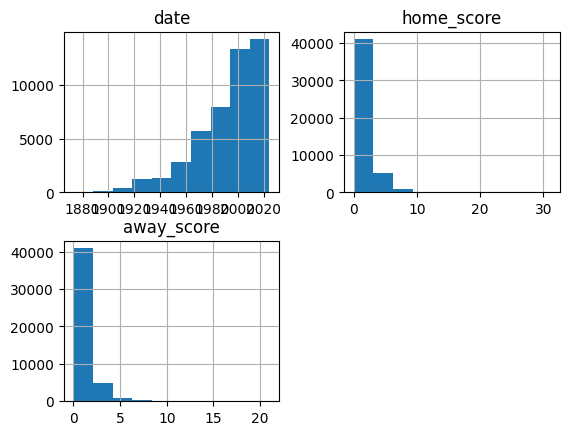

In [364]:
df_results.hist()

<hr class="my-4">

### Datenexploration

#### Wie viele Spiele gibt es insgesamt?

In [365]:
num_matches = df_results_fifa.shape[0]
display(num_matches)

40771

#### Was ist das durchschnittliche Heimspielergebnis / Auswärtsspielergebnis?

In [366]:
average_home_score = df_results_fifa['home_score'].mean()
average_away_score = df_results_fifa['away_score'].mean()
display(average_home_score, average_away_score)

1.7251723038434181

1.153785779107699

#### Gibt es einen Heimvorteil? Durchschnittliche Ergebnisse für Heimspiele vs. Auswärtsspiele

In [367]:
home_advantage = df_results_fifa.groupby('neutral').agg({'home_score': 'mean', 'away_score': 'mean'}).reset_index()
display(home_advantage)

,neutral,home_score,away_score
0,False,1.763645,1.095993
1,True,1.611666,1.324290


#### Welche Teams sind die Top 10? 

In [368]:
top_scoring_teams = df_goalscorers_extended['team'].value_counts().head(10).reset_index()
top_scoring_teams.columns = ['team', 'goals']
display(top_scoring_teams)

,team,goals
0,Brazil,1046
1,Germany,963
2,Argentina,939
3,Spain,884
4,Netherlands,848
5,Mexico,843
6,Uruguay,793
7,England,768
8,France,767
9,Italy,724


#### Welche Spieler sind die Top 10? 

In [369]:
top_players = df_goalscorers_extended['scorer'].value_counts().head(10).reset_index()
top_players.columns = ['scorer', 'goals']
display(top_players)

,scorer,goals
0,Cristiano Ronaldo,111
1,Robert Lewandowski,62
2,Romelu Lukaku,61
3,Harry Kane,55
4,Lionel Messi,54
5,Edin Džeko,50
6,Ali Daei,49
7,Miroslav Klose,48
8,Aleksandar Mitrović,47
9,Carlos Ruiz,47


#### Wie entwickelte sich die Anzahl an Spielen über einen Zeitraum von 152 Jahren? 

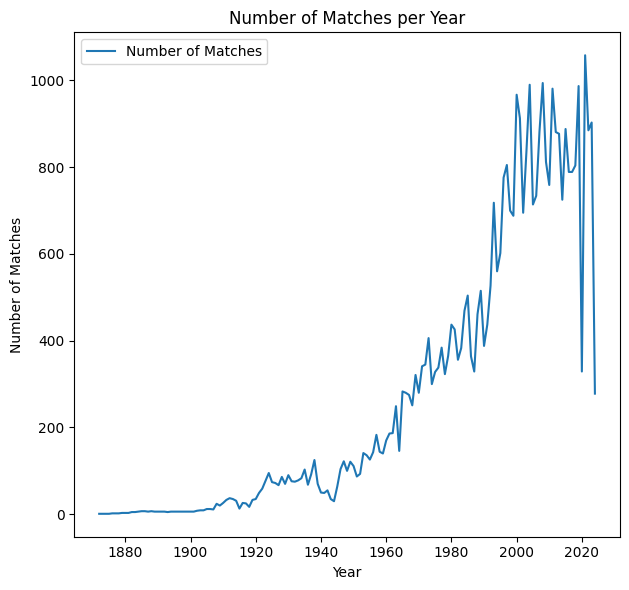

In [370]:
df_results_fifa['year'] = df_results_fifa['date'].dt.year

matches_per_year = df_results_fifa.groupby('year').size().reset_index(name='num_matches')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(matches_per_year['year'], matches_per_year['num_matches'], label='Number of Matches')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Year')
plt.legend()
plt.tight_layout()
plt.show()

#### Wie veränderten sich die Ergebnisse über einen Zeitraum von 152 Jahren? 

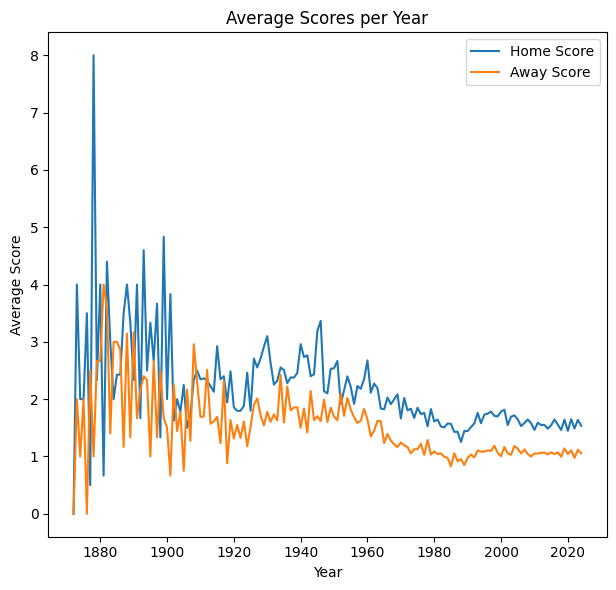

In [371]:
df_goalscorers_extended['year'] = df_goalscorers_extended['date'].dt.year

average_scores_per_year = df_results_fifa.groupby('year').agg({'home_score': 'mean', 'away_score': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(average_scores_per_year['year'], average_scores_per_year['home_score'], label='Home Score')
plt.plot(average_scores_per_year['year'], average_scores_per_year['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Scores per Year')
plt.legend()

plt.tight_layout()
plt.show()

Wie entwickelten sich die Gesamttore über 152 Jahre? 

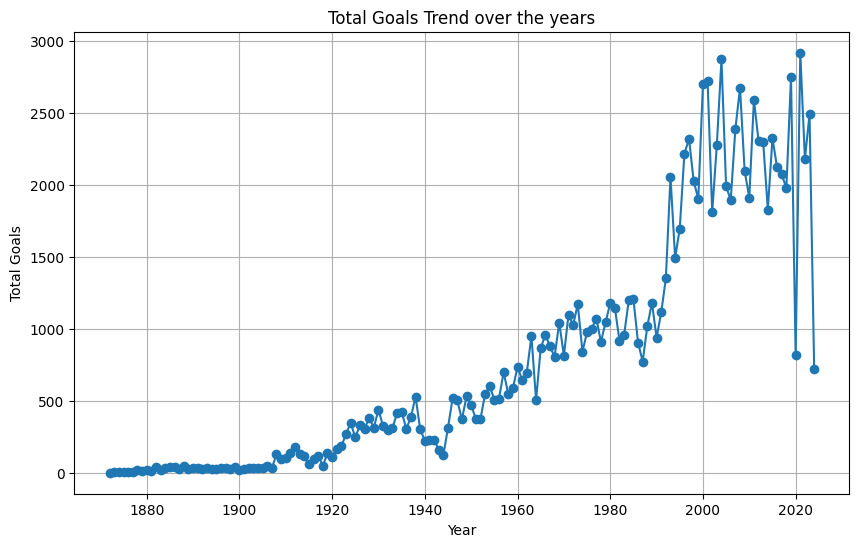

In [372]:
# Total Goals Trend over the years
df_results_fifa['total_goals'] = df_results_fifa['home_score'] + df_results_fifa['away_score']
goals_per_year_results = df_results_fifa.groupby('year')['total_goals'].sum()


plt.figure(figsize=(10, 6))
goals_per_year_results.plot(kind='line', marker='o')
plt.title('Total Goals Trend over the years')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)
plt.show()

Heimvorteilsanalyse: Durchschnittliche Ergebnisse pro Region, pro Team, über die Zeit 

In [373]:
home_advantage_by_country = df_results_fifa.groupby('country').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'neutral': 'count'
}).reset_index().rename(columns={'neutral': 'num_matches'}).sort_values(by='num_matches', ascending=False).head(10)
display("Home Advantage by Country", home_advantage_by_country)


'Home Advantage by Country'

,country,home_score,away_score,num_matches
229,United States,1.524901,1.145455,1265
71,France,1.838710,1.115007,713
126,Malaysia,1.824034,1.231760,699
173,Qatar,1.587798,1.111607,672
217,Thailand,1.711538,1.238782,624
62,England,2.140203,0.917230,592
79,Germany,2.258993,1.091727,556
227,United Arab Emirates,1.494565,1.130435,552
198,South Africa,1.231618,1.003676,544
26,Brazil,2.092105,1.033835,532


In [374]:
home_advantage_by_team = df_results_fifa.groupby('home_team').agg({
    'home_score': 'mean',
    'away_score': 'mean',
    'neutral': 'count'
}).reset_index().rename(columns={'neutral': 'num_matches'}).sort_values(by='num_matches', ascending=False).head(10)
display("Home Advantage by Team", home_advantage_by_team)


'Home Advantage by Team'

,home_team,home_score,away_score,num_matches
8,Argentina,2.253054,0.842932,573
27,Brazil,2.482270,0.813830,564
118,Mexico,2.030909,0.841818,550
170,South Korea,2.039139,0.745597,511
57,England,2.316206,0.879447,506
176,Sweden,2.352113,1.108652,497
70,Germany,2.518145,1.060484,496
66,France,2.113006,1.063966,469
194,United States,1.751111,0.986667,450
93,Japan,1.920455,1.127273,440


In [375]:
home_advantage_over_time = df_results_fifa.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()
display("Home Advantage over Time", home_advantage_over_time)


'Home Advantage over Time'

,year,home_score,away_score
0,1872,0.000000,0.000000
1,1873,4.000000,2.000000
2,1874,2.000000,1.000000
3,1875,2.000000,2.000000
4,1876,3.500000,0.000000
...,...,...,...
148,2020,1.446809,1.042553
149,2021,1.650284,1.106805
150,2022,1.488136,0.975141
151,2023,1.640089,1.117386


In welchem Land / Auf welchem Kontinent werden die meisten Spiele gespielt? 

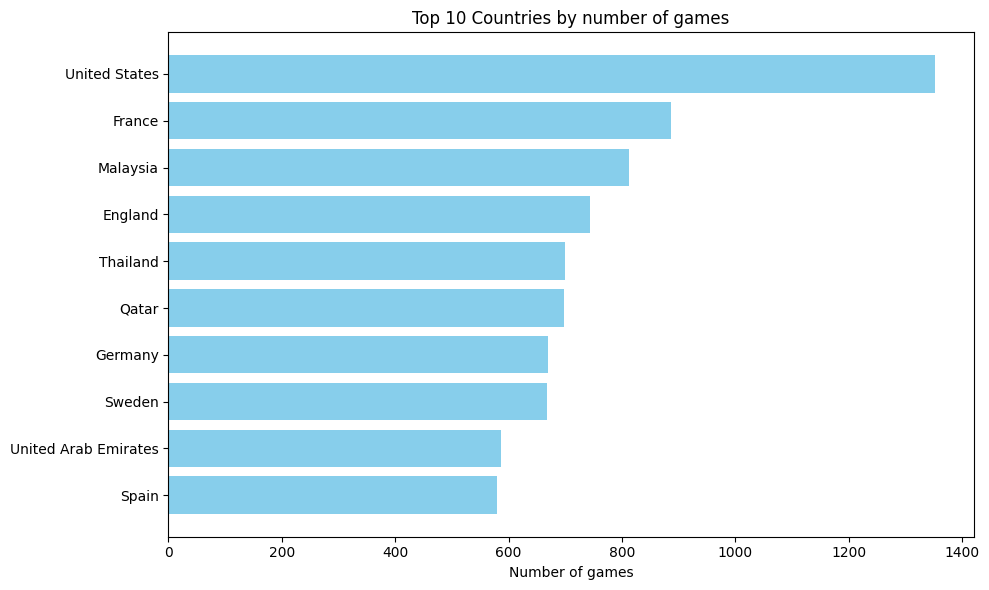

In [376]:
matches_per_country = df_results['country'].value_counts()

top_10_countries = matches_per_country.head(10).sort_values(ascending=True)


fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.barh(top_10_countries.index, top_10_countries.values, color='skyblue')
axs.set_xlabel('Number of games')
axs.set_title('Top 10 Countries by number of games')

plt.tight_layout()
plt.show()

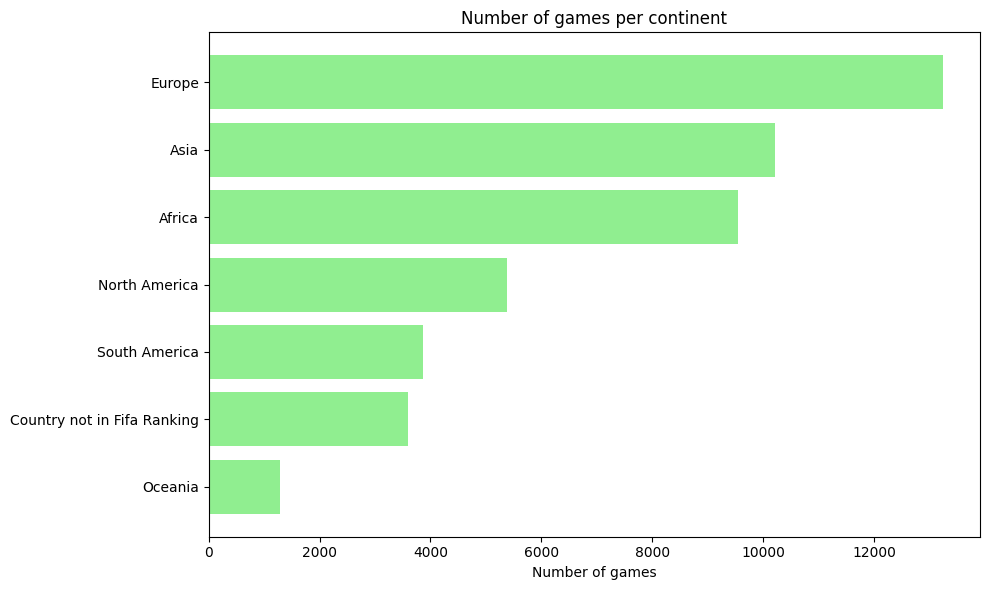

In [377]:
matches_per_continent = df_results['home_continent'].value_counts().sort_values(ascending=True)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))

axs.barh(matches_per_continent.index, matches_per_continent.values, color='lightgreen')
axs.set_xlabel('Number of games')
axs.set_title('Number of games per continent')


plt.tight_layout()
plt.show()

In welchen Spielminuten fallen die meisten Tore? 

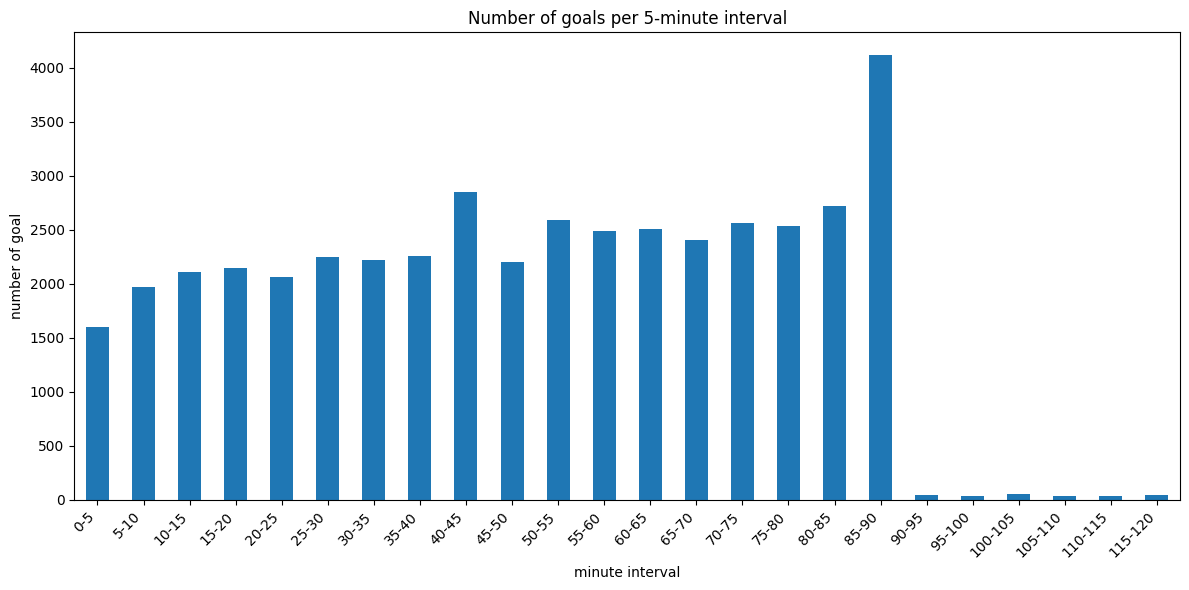

In [378]:
intervals = pd.interval_range(start=0, end=120, freq=5, closed='right')

df_goalscorers_minute = pd.cut(df_goalscorers['minute'], bins=intervals)

interval_counts_5 = df_goalscorers_minute.value_counts().sort_index()


fig, ax = plt.subplots(figsize=(12, 6))
interval_counts_5.plot(kind='bar', ax=ax)

ax.set_title('Number of goals per 5-minute interval')
ax.set_xlabel('minute interval')
ax.set_ylabel('number of goal')

ax.set_xticklabels([f'{int(interval.left)}-{int(interval.right)}' for interval in interval_counts_5.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()

Wieviee  Heimsiege und wieviele Auswärtssiege gibt es? 

In [379]:
df_results_home_away = df_results_fifa[df_results_fifa['home_team'] != df_results_fifa['away_team']]

home_wins = df_results_home_away[df_results_home_away['winning_country'] == df_results_home_away['home_team']].shape[0]

away_wins = df_results_home_away[df_results_home_away['winning_country'] == df_results_home_away['away_team']].shape[0]

print(f"Home wins: {home_wins}")
print(f"Away wins: {away_wins}")

Home wins: 19922
Away wins: 11435


Wie häufig geht ein Spiel unentschieden aus? 

In [380]:
draws = df_results_fifa[df_results_fifa['winning_country'] == 'Unentschieden'].shape[0]

print(f"Draws: {draws}")

Draws: 9414


Welche Turniere gibt es? 

In [381]:
tournaments = df_results_fifa['tournament'].unique()
print(tournaments)

['Friendly' 'British Home Championship' 'Évence Coppée Trophy'
 'Copa Lipton' 'Copa Newton' 'Copa Premio Honor Argentino'
 'Copa Premio Honor Uruguayo' 'Copa Roca' 'Copa América'
 'Far Eastern Championship Games' 'Copa Chevallier Boutell'
 'Olympic Games' 'Nordic Championship'
 'Central European International Cup' 'Baltic Cup'
 'Central American and Caribbean Games' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'Bolivarian Games'
 'CCCF Championship' 'NAFC Championship' 'Copa Oswaldo Cruz' 'Asian Games'
 'Pan American Championship' 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'Southeast Asian Peninsular Games'
 'African Friendship Games' 'Windward Islands Tournament'
 'African Cup of Nations qualification' 'Vietnam Independence Cup'
 'Copa Carlos Dittborn' 'Phillip Seaga Cup' 'CONCACAF Championshi

Wie verhalten sich die durchschnittlichen Ergebnisse des FIFA World Cups pro Jahr?

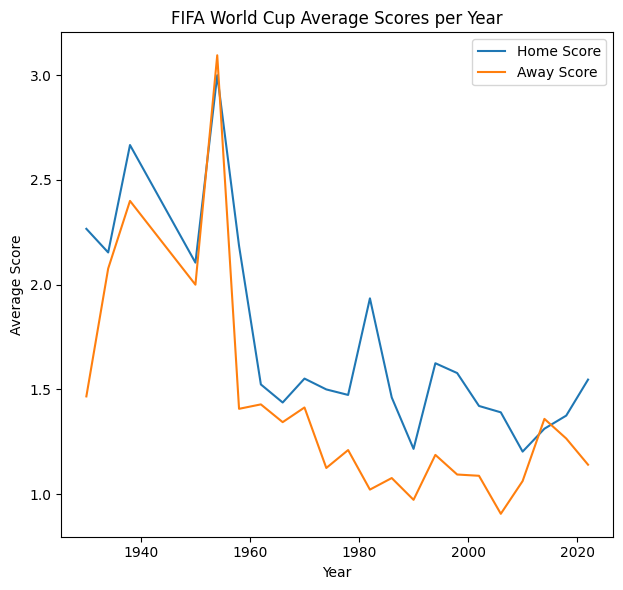

In [382]:
world_cup_data = df_results_fifa[df_results_fifa['tournament'] == 'FIFA World Cup']
world_cup_trends = world_cup_data.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(world_cup_trends['year'], world_cup_trends['home_score'], label='Home Score')
plt.plot(world_cup_trends['year'], world_cup_trends['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('FIFA World Cup Average Scores per Year')
plt.legend()
plt.tight_layout()
plt.show()

Wie verhalten sich die durchschnittlichen Ergebnisse des UEFA EURO pro Jahr?

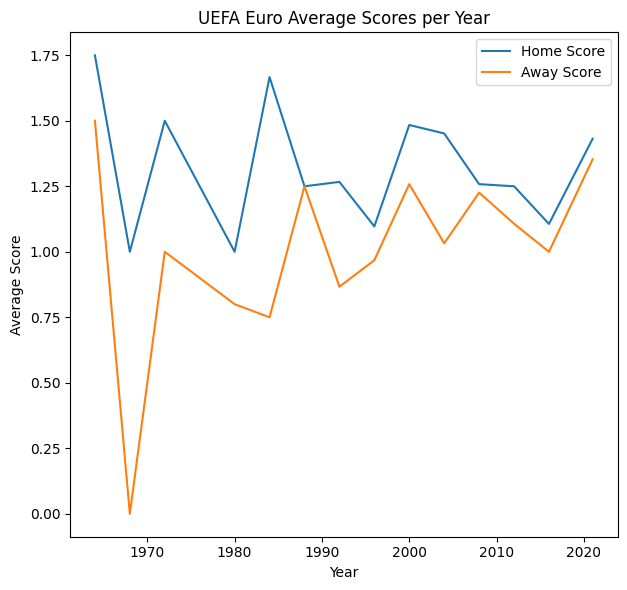

In [383]:
euro_data = df_results_fifa[df_results_fifa['tournament'] == 'UEFA Euro']
euro_trends = euro_data.groupby('year').agg({
    'home_score': 'mean',
    'away_score': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(euro_trends['year'], euro_trends['home_score'], label='Home Score')
plt.plot(euro_trends['year'], euro_trends['away_score'], label='Away Score')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('UEFA Euro Average Scores per Year')
plt.legend()

plt.tight_layout()
plt.show()

#### Länderspezifische Analyse

##### Alle Länder

In [423]:
# Anzahl der Heim- und Auswärtsspiele für jedes Team zählen
total_matches_home = df_results_fifa['home_team'].value_counts()
total_matches_away = df_results_fifa['away_team'].value_counts()

# Gesamtanzahl der Spiele durch Addition der Heim- und Auswärtsspiele für jedes Team zählen
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Anzahl der Heim- und Auswärtssiege für jedes Team zählen
home_wins = df_results_fifa[df_results_fifa['home_score'] > df_results_fifa['away_score']]['home_team'].value_counts()
away_wins = df_results_fifa[df_results_fifa['away_score'] > df_results_fifa['home_score']]['away_team'].value_counts()

# Gesamtanzahl der Siege durch Addition der Heim- und Auswärtssiege für jedes Team zählen
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Gewinnprozentsätze für Heim-, Auswärts- und Gesamtspiele berechnen
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Ergebnisse in einem DataFrame zusammenfassen
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)


Wie ist die Performance zwischen den Ländern? 

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,983,564,419,631.0,407.0,224.0,64.191251,72.163121,53.460621
Spain,687,355,332,404.0,244.0,160.0,58.806405,68.732394,48.192771
Germany,934,496,438,544.0,307.0,237.0,58.244111,61.895161,54.109589
England,1012,506,506,582.0,316.0,266.0,57.509881,62.450593,52.569170
Iran,557,317,240,319.0,202.0,117.0,57.271095,63.722397,48.750000
Argentina,1016,573,443,558.0,385.0,173.0,54.921260,67.190227,39.051919
Italy,796,437,359,430.0,278.0,152.0,54.020101,63.615561,42.339833
Tahiti,214,104,110,115.0,63.0,52.0,53.738318,60.576923,47.272727
Croatia,363,178,185,193.0,106.0,87.0,53.168044,59.550562,47.027027
South Korea,930,511,419,493.0,306.0,187.0,53.010753,59.882583,44.630072


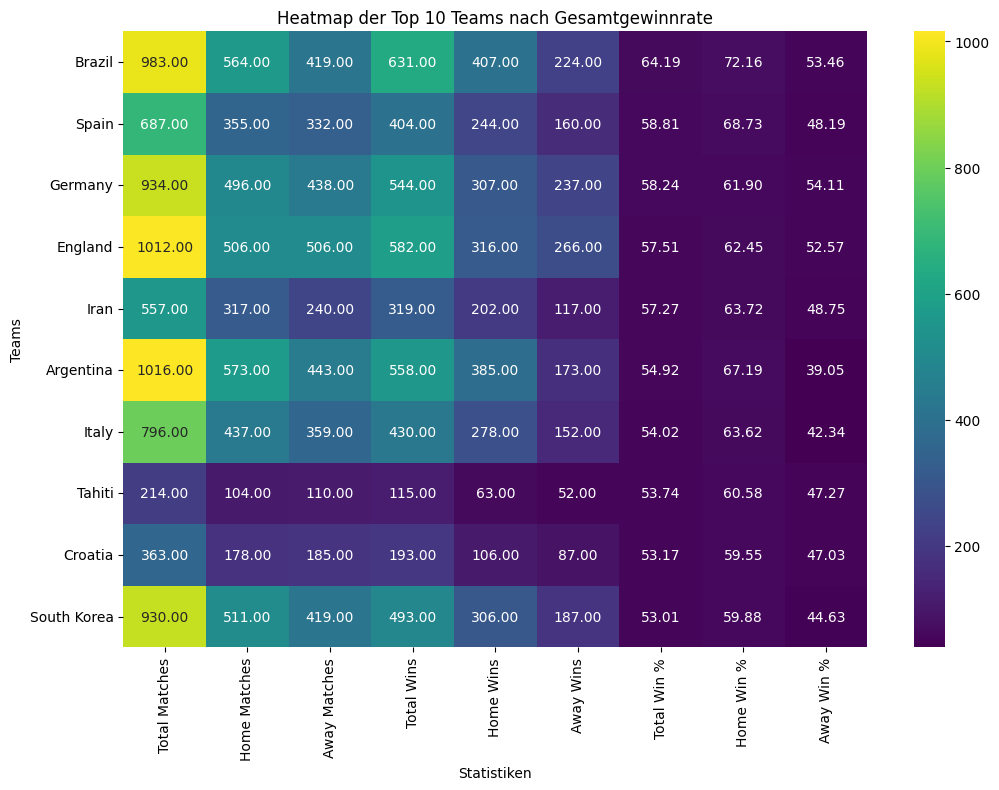

In [425]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

plt.figure(figsize=(12, 8))
sns.heatmap(results_sorted_by_total_win_rate, annot=True, fmt='.2f', cmap='viridis', cbar=True)

# Titel und Achsenbeschriftungen
plt.title('Heatmap der Top 10 Teams nach Gesamtgewinnrate')
plt.xlabel('Statistiken')
plt.ylabel('Teams')

# Anzeigen der Heatmap
plt.show()

In [426]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,983,564,419,631.0,407.0,224.0,64.191251,72.163121,53.460621
Spain,687,355,332,404.0,244.0,160.0,58.806405,68.732394,48.192771
Argentina,1016,573,443,558.0,385.0,173.0,54.921260,67.190227,39.051919
Egypt,684,401,283,343.0,265.0,78.0,50.146199,66.084788,27.561837
Ivory Coast,563,287,276,285.0,187.0,98.0,50.621670,65.156794,35.507246
Czech Republic,335,162,173,177.0,105.0,72.0,52.835821,64.814815,41.618497
Iran,557,317,240,319.0,202.0,117.0,57.271095,63.722397,48.750000
Italy,796,437,359,430.0,278.0,152.0,54.020101,63.615561,42.339833
New Caledonia,238,131,107,121.0,83.0,38.0,50.840336,63.358779,35.514019
Ghana,610,291,319,280.0,183.0,97.0,45.901639,62.886598,30.407524


In [427]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Germany,934,496,438,544.0,307.0,237.0,58.244111,61.895161,54.109589
Brazil,983,564,419,631.0,407.0,224.0,64.191251,72.163121,53.460621
England,1012,506,506,582.0,316.0,266.0,57.509881,62.450593,52.569170
Iran,557,317,240,319.0,202.0,117.0,57.271095,63.722397,48.750000
Spain,687,355,332,404.0,244.0,160.0,58.806405,68.732394,48.192771
Tahiti,214,104,110,115.0,63.0,52.0,53.738318,60.576923,47.272727
Croatia,363,178,185,193.0,106.0,87.0,53.168044,59.550562,47.027027
South Korea,930,511,419,493.0,306.0,187.0,53.010753,59.882583,44.630072
Netherlands,791,429,362,405.0,247.0,158.0,51.201011,57.575758,43.646409
Russia,666,292,374,338.0,177.0,161.0,50.750751,60.616438,43.048128


Welche Länder haben am häufigsten gespielt? 

In [434]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
display(most_matches_df[['Country', 'Total Matches']])

,Country,Total Matches
0,Mexico,416.0
1,South Korea,404.0
2,Brazil,328.0
3,Iraq,308.0
4,Thailand,301.0
5,Argentina,292.0
6,Saudi Arabia,289.0
7,Indonesia,285.0
8,Japan,280.0
9,Myanmar,263.0


Welches Land hat die meisten Strafstöße?

In [442]:
penalty = df_goalscorers_extended[df_goalscorers_extended['penalty'] == True]
penalty_counts = penalty['team'].value_counts().head(15)
print(penalty_counts)

Mexico         65
Brazil         64
England        61
Argentina      58
Netherlands    58
Germany        54
Spain          54
Sweden         52
Italy          51
Denmark        51
France         50
Uruguay        47
Belgium        45
Austria        43
Hungary        41
Name: team, dtype: int64


In [448]:
# Anzahl der Heimspiele und Heimtore pro Land
home_stats = df_results_fifa.groupby('home_team').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['team', 'home_goals', 'home_games']

# Anzahl der Auswärtsspiele und Auswärtstore pro Land
away_stats = df_results_fifa.groupby('away_team').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['team', 'away_goals', 'away_games']

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Berechnung der Gesamtzahl der Tore und Spiele
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Berechnung der durchschnittlichen Tore pro Spiel
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Berechnung der durchschnittlichen Heim- und Auswärtstore pro Spiel
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sortieren nach durchschnittlichen Toren pro Spiel in absteigender Reihenfolge
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Runden der durchschnittlichen Tore pro Spiel auf 2 Dezimalstellen
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)


In [449]:
top_avg_goals = total_stats.head(10)
print("Top 10 Teams nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 Teams nach durchschnittlichen Toren pro Spiel:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
129,New Caledonia,363.0,131,222.0,107,585.0,238,2.46,2.77,2.07
179,Tahiti,282.0,104,239.0,110,521.0,214,2.43,2.71,2.17
70,Germany,1249.0,496,861.0,438,2110.0,934,2.26,2.52,1.97
57,England,1172.0,506,1066.0,506,2238.0,1012,2.21,2.32,2.11
27,Brazil,1400.0,564,749.0,419,2149.0,983,2.19,2.48,1.79
128,Netherlands,1029.0,429,635.0,362,1664.0,791,2.10,2.40,1.75
11,Australia,720.0,300,382.0,234,1102.0,534,2.06,2.40,1.63
172,Spain,865.0,355,549.0,332,1414.0,687,2.06,2.44,1.65
83,Hungary,997.0,434,766.0,443,1763.0,877,2.01,2.30,1.73
167,Solomon Islands,223.0,88,159.0,103,382.0,191,2.00,2.53,1.54


In [450]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
129,New Caledonia,363.0,131,222.0,107,585.0,238,2.46,2.77,2.07
179,Tahiti,282.0,104,239.0,110,521.0,214,2.43,2.71,2.17
167,Solomon Islands,223.0,88,159.0,103,382.0,191,2.00,2.53,1.54
70,Germany,1249.0,496,861.0,438,2110.0,934,2.26,2.52,1.97
27,Brazil,1400.0,564,749.0,419,2149.0,983,2.19,2.48,1.79
172,Spain,865.0,355,549.0,332,1414.0,687,2.06,2.44,1.65
128,Netherlands,1029.0,429,635.0,362,1664.0,791,2.10,2.40,1.75
11,Australia,720.0,300,382.0,234,1102.0,534,2.06,2.40,1.63
130,New Zealand,353.0,149,296.0,223,649.0,372,1.74,2.37,1.33
176,Sweden,1169.0,497,875.0,530,2044.0,1027,1.99,2.35,1.65


In [451]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
179,Tahiti,282.0,104,239.0,110,521.0,214,2.43,2.71,2.17
57,England,1172.0,506,1066.0,506,2238.0,1012,2.21,2.32,2.11
129,New Caledonia,363.0,131,222.0,107,585.0,238,2.46,2.77,2.07
70,Germany,1249.0,496,861.0,438,2110.0,934,2.26,2.52,1.97
142,Papua New Guinea,86.0,55,146.0,77,232.0,132,1.76,1.56,1.90
27,Brazil,1400.0,564,749.0,419,2149.0,983,2.19,2.48,1.79
128,Netherlands,1029.0,429,635.0,362,1664.0,791,2.10,2.40,1.75
83,Hungary,997.0,434,766.0,443,1763.0,877,2.01,2.30,1.73
197,Vanuatu,110.0,72,203.0,118,313.0,190,1.65,1.53,1.72
172,Spain,865.0,355,549.0,332,1414.0,687,2.06,2.44,1.65


Welches Land hat die meisten Tore erzielt?

In [452]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['team', 'total_goals']])


Länder mit den meisten erzielten Toren:


,team,total_goals
0,England,2238.0
1,Brazil,2149.0
2,Germany,2110.0
3,Sweden,2044.0
4,Argentina,1933.0
5,Hungary,1763.0
6,Netherlands,1664.0
7,South Korea,1657.0
8,Mexico,1646.0
9,France,1530.0


##### Neutrale Länder 

In [428]:
df_results_neutral_countries = df_results_fifa[df_results_fifa["neutral"] == True]

In [429]:
# Anzahl der Heim- und Auswärtsspiele für jedes Team zählen
total_matches_home = df_results_neutral_countries['home_team'].value_counts()
total_matches_away = df_results_neutral_countries['away_team'].value_counts()

# Gesamtanzahl der Spiele durch Addition der Heim- und Auswärtsspiele für jedes Team zählen
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Anzahl der Heim- und Auswärtssiege für jedes Team zählen
home_wins = df_results_neutral_countries[df_results_neutral_countries['home_score'] > df_results_neutral_countries['away_score']]['home_team'].value_counts()
away_wins = df_results_neutral_countries[df_results_neutral_countries['away_score'] > df_results_neutral_countries['home_score']]['away_team'].value_counts()

# Gesamtanzahl der Siege durch Addition der Heim- und Auswärtssiege für jedes Team zählen
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Gewinnprozentsätze für Heim-, Auswärts- und Gesamtspiele berechnen
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Ergebnisse in einem DataFrame zusammenfassen
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [430]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,328.0,232.0,96.0,218.0,162.0,56.0,66.463415,69.827586,58.333333
Tahiti,112.0,66.0,46.0,71.0,44.0,27.0,63.392857,66.666667,58.695652
Argentina,292.0,234.0,58.0,183.0,160.0,23.0,62.671233,68.376068,39.655172
France,107.0,56.0,51.0,59.0,35.0,24.0,55.140187,62.500000,47.058824
Germany,147.0,87.0,60.0,81.0,51.0,30.0,55.102041,58.620690,50.000000
New Caledonia,109.0,58.0,51.0,60.0,38.0,22.0,55.045872,65.517241,43.137255
Israel,40.0,27.0,13.0,22.0,15.0,7.0,55.000000,55.555556,53.846154
Spain,122.0,56.0,66.0,67.0,32.0,35.0,54.918033,57.142857,53.030303
Australia,132.0,85.0,47.0,72.0,51.0,21.0,54.545455,60.000000,44.680851
Portugal,101.0,44.0,57.0,55.0,27.0,28.0,54.455446,61.363636,49.122807


In [431]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,328.0,232.0,96.0,218.0,162.0,56.0,66.463415,69.827586,58.333333
Argentina,292.0,234.0,58.0,183.0,160.0,23.0,62.671233,68.376068,39.655172
Montenegro,5.0,3.0,2.0,2.0,2.0,0.0,40.000000,66.666667,0.000000
Samoa,20.0,9.0,11.0,7.0,6.0,1.0,35.000000,66.666667,9.090909
Tahiti,112.0,66.0,46.0,71.0,44.0,27.0,63.392857,66.666667,58.695652
New Caledonia,109.0,58.0,51.0,60.0,38.0,22.0,55.045872,65.517241,43.137255
Russia,121.0,54.0,67.0,65.0,35.0,30.0,53.719008,64.814815,44.776119
Saint Vincent and the Grenadines,46.0,14.0,32.0,18.0,9.0,9.0,39.130435,64.285714,28.125000
France,107.0,56.0,51.0,59.0,35.0,24.0,55.140187,62.500000,47.058824
Egypt,200.0,137.0,63.0,100.0,85.0,15.0,50.000000,62.043796,23.809524


In [432]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Netherlands,92.0,53.0,39.0,49.0,26.0,23.0,53.260870,49.056604,58.974359
Tahiti,112.0,66.0,46.0,71.0,44.0,27.0,63.392857,66.666667,58.695652
Brazil,328.0,232.0,96.0,218.0,162.0,56.0,66.463415,69.827586,58.333333
Israel,40.0,27.0,13.0,22.0,15.0,7.0,55.000000,55.555556,53.846154
Uruguay,232.0,62.0,170.0,116.0,25.0,91.0,50.000000,40.322581,53.529412
Uzbekistan,94.0,36.0,58.0,51.0,20.0,31.0,54.255319,55.555556,53.448276
Spain,122.0,56.0,66.0,67.0,32.0,35.0,54.918033,57.142857,53.030303
Germany,147.0,87.0,60.0,81.0,51.0,30.0,55.102041,58.620690,50.000000
Tajikistan,58.0,30.0,28.0,30.0,16.0,14.0,51.724138,53.333333,50.000000
Mexico,416.0,278.0,138.0,209.0,141.0,68.0,50.240385,50.719424,49.275362


Welche neutralen Länder haben am häufigsten gespielt?

In [433]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Mexico,416.0
1,South Korea,404.0
2,Brazil,328.0
3,Iraq,308.0
4,Thailand,301.0
5,Argentina,292.0
6,Saudi Arabia,289.0
7,Indonesia,285.0
8,Japan,280.0
9,Myanmar,263.0


In [453]:
# Anzahl der Heimspiele und Heimtore pro Land
home_stats = df_results_neutral_countries.groupby('home_team').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['team', 'home_goals', 'home_games']

# Anzahl der Auswärtsspiele und Auswärtstore pro Land
away_stats = df_results_neutral_countries.groupby('away_team').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['team', 'away_goals', 'away_games']

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Berechnung der Gesamtzahl der Tore und Spiele
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Berechnung der durchschnittlichen Tore pro Spiel
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Berechnung der durchschnittlichen Heim- und Auswärtstore pro Spiel
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sortieren nach durchschnittlichen Toren pro Spiel in absteigender Reihenfolge
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Runden der durchschnittlichen Tore pro Spiel auf 2 Dezimalstellen
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)


In [454]:
top_avg_goals = total_stats.head(10)
print("Top 10 Teams nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 Teams nach durchschnittlichen Toren pro Spiel:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
128,New Caledonia,172.0,58.0,136.0,51.0,308.0,109.0,2.83,2.97,2.67
178,Tahiti,173.0,66.0,142.0,46.0,315.0,112.0,2.81,2.62,3.09
63,Fiji,200.0,68.0,77.0,35.0,277.0,103.0,2.69,2.94,2.20
166,Solomon Islands,126.0,38.0,94.0,55.0,220.0,93.0,2.37,3.32,1.71
27,Brazil,556.0,232.0,192.0,96.0,748.0,328.0,2.28,2.40,2.00
8,Argentina,562.0,234.0,89.0,58.0,651.0,292.0,2.23,2.40,1.53
88,Israel,62.0,27.0,26.0,13.0,88.0,40.0,2.20,2.30,2.00
82,Hungary,83.0,34.0,52.0,28.0,135.0,62.0,2.18,2.44,1.86
11,Australia,190.0,85.0,90.0,47.0,280.0,132.0,2.12,2.24,1.91
141,Papua New Guinea,53.0,35.0,109.0,42.0,162.0,77.0,2.10,1.51,2.60


In [455]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
166,Solomon Islands,126.0,38.0,94.0,55.0,220.0,93.0,2.37,3.32,1.71
128,New Caledonia,172.0,58.0,136.0,51.0,308.0,109.0,2.83,2.97,2.67
63,Fiji,200.0,68.0,77.0,35.0,277.0,103.0,2.69,2.94,2.20
155,Samoa,26.0,9.0,12.0,11.0,38.0,20.0,1.90,2.89,1.09
154,Saint Vincent and the Grenadines,37.0,14.0,39.0,32.0,76.0,46.0,1.65,2.64,1.22
178,Tahiti,173.0,66.0,142.0,46.0,315.0,112.0,2.81,2.62,3.09
82,Hungary,83.0,34.0,52.0,28.0,135.0,62.0,2.18,2.44,1.86
8,Argentina,562.0,234.0,89.0,58.0,651.0,292.0,2.23,2.40,1.53
27,Brazil,556.0,232.0,192.0,96.0,748.0,328.0,2.28,2.40,2.00
73,Grenada,72.0,31.0,41.0,32.0,113.0,63.0,1.79,2.32,1.28


In [456]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
178,Tahiti,173.0,66.0,142.0,46.0,315.0,112.0,2.81,2.62,3.09
128,New Caledonia,172.0,58.0,136.0,51.0,308.0,109.0,2.83,2.97,2.67
141,Papua New Guinea,53.0,35.0,109.0,42.0,162.0,77.0,2.10,1.51,2.60
127,Netherlands,91.0,53.0,88.0,39.0,179.0,92.0,1.95,1.72,2.26
63,Fiji,200.0,68.0,77.0,35.0,277.0,103.0,2.69,2.94,2.20
195,Uzbekistan,61.0,36.0,122.0,58.0,183.0,94.0,1.95,1.69,2.10
188,Turkmenistan,50.0,25.0,73.0,35.0,123.0,60.0,2.05,2.00,2.09
194,Uruguay,93.0,62.0,347.0,170.0,440.0,232.0,1.90,1.50,2.04
196,Vanuatu,54.0,27.0,157.0,78.0,211.0,105.0,2.01,2.00,2.01
27,Brazil,556.0,232.0,192.0,96.0,748.0,328.0,2.28,2.40,2.00


In [457]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['team', 'total_goals']])

Länder mit den meisten erzielten Toren:


,team,total_goals
0,Brazil,748.0
1,South Korea,710.0
2,Mexico,693.0
3,Argentina,651.0
4,Japan,514.0
5,Iraq,511.0
6,Indonesia,510.0
7,Myanmar,499.0
8,Kuwait,467.0
9,Thailand,467.0


##### Nicht-neutrale Länder

In [436]:
df_results_not_neutral_countries = df_results_fifa[df_results_fifa["neutral"] == False]

In [437]:
# Anzahl der Heim- und Auswärtsspiele für jedes Team zählen
total_matches_home = df_results_not_neutral_countries['home_team'].value_counts()
total_matches_away = df_results_not_neutral_countries['away_team'].value_counts()

# Gesamtanzahl der Spiele durch Addition der Heim- und Auswärtsspiele für jedes Team zählen
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Anzahl der Heim- und Auswärtssiege für jedes Team zählen
home_wins = df_results_not_neutral_countries[df_results_not_neutral_countries['home_score'] > df_results_not_neutral_countries['away_score']]['home_team'].value_counts()
away_wins = df_results_not_neutral_countries[df_results_not_neutral_countries['away_score'] > df_results_not_neutral_countries['home_score']]['away_team'].value_counts()

# Gesamtanzahl der Siege durch Addition der Heim- und Auswärtssiege für jedes Team zählen
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Gewinnprozentsätze für Heim-, Auswärts- und Gesamtspiele berechnen
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Ergebnisse in einem DataFrame zusammenfassen
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [438]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,655.0,332.0,323,413.0,245.0,168.0,63.053435,73.795181,52.012384
Iran,353.0,199.0,154,218.0,141.0,77.0,61.756374,70.854271,50.000000
England,903.0,454.0,449,539.0,293.0,246.0,59.689922,64.537445,54.788419
Spain,565.0,299.0,266,337.0,212.0,125.0,59.646018,70.903010,46.992481
Germany,787.0,409.0,378,463.0,256.0,207.0,58.831004,62.591687,54.761905
Italy,648.0,356.0,292,364.0,240.0,124.0,56.172840,67.415730,42.465753
Croatia,295.0,145.0,150,165.0,95.0,70.0,55.932203,65.517241,46.666667
South Korea,526.0,319.0,207,289.0,199.0,90.0,54.942966,62.382445,43.478261
Czech Republic,281.0,135.0,146,151.0,90.0,61.0,53.736655,66.666667,41.780822
Mexico,516.0,272.0,244,271.0,186.0,85.0,52.519380,68.382353,34.836066


In [439]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Brazil,655.0,332.0,323,413.0,245.0,168.0,63.053435,73.795181,52.012384
Spain,565.0,299.0,266,337.0,212.0,125.0,59.646018,70.903010,46.992481
Iran,353.0,199.0,154,218.0,141.0,77.0,61.756374,70.854271,50.000000
Guinea,327.0,125.0,202,123.0,87.0,36.0,37.614679,69.600000,17.821782
Ivory Coast,378.0,189.0,189,190.0,130.0,60.0,50.264550,68.783069,31.746032
Mexico,516.0,272.0,244,271.0,186.0,85.0,52.519380,68.382353,34.836066
Iraq,285.0,101.0,184,126.0,69.0,57.0,44.210526,68.316832,30.978261
Egypt,484.0,264.0,220,243.0,180.0,63.0,50.206612,68.181818,28.636364
Ghana,410.0,182.0,228,191.0,124.0,67.0,46.585366,68.131868,29.385965
Nigeria,415.0,193.0,222,197.0,131.0,66.0,47.469880,67.875648,29.729730


In [440]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
England,903.0,454.0,449,539.0,293.0,246.0,59.689922,64.537445,54.788419
Germany,787.0,409.0,378,463.0,256.0,207.0,58.831004,62.591687,54.761905
Brazil,655.0,332.0,323,413.0,245.0,168.0,63.053435,73.795181,52.012384
Iran,353.0,199.0,154,218.0,141.0,77.0,61.756374,70.854271,50.000000
Spain,565.0,299.0,266,337.0,212.0,125.0,59.646018,70.903010,46.992481
Croatia,295.0,145.0,150,165.0,95.0,70.0,55.932203,65.517241,46.666667
South Korea,526.0,319.0,207,289.0,199.0,90.0,54.942966,62.382445,43.478261
Russia,545.0,238.0,307,273.0,142.0,131.0,50.091743,59.663866,42.671010
Italy,648.0,356.0,292,364.0,240.0,124.0,56.172840,67.415730,42.465753
Netherlands,699.0,376.0,323,356.0,221.0,135.0,50.929900,58.776596,41.795666


Welche nicht-neutralen Länder haben am häufigsten gespielt? 

In [441]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Sweden,912.0
1,England,903.0
2,Hungary,815.0
3,Germany,787.0
4,Norway,755.0
5,Scotland,750.0
6,Denmark,728.0
7,Argentina,724.0
8,Switzerland,721.0
9,France,718.0


In [458]:
# Anzahl der Heimspiele und Heimtore pro Land
home_stats = df_results_not_neutral_countries.groupby('home_team').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['team', 'home_goals', 'home_games']

# Anzahl der Auswärtsspiele und Auswärtstore pro Land
away_stats = df_results_not_neutral_countries.groupby('away_team').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['team', 'away_goals', 'away_games']

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Berechnung der Gesamtzahl der Tore und Spiele
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Berechnung der durchschnittlichen Tore pro Spiel
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Berechnung der durchschnittlichen Heim- und Auswärtstore pro Spiel
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sortieren nach durchschnittlichen Toren pro Spiel in absteigender Reihenfolge
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Runden der durchschnittlichen Tore pro Spiel auf 2 Dezimalstellen
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)


In [459]:
top_avg_goals = total_stats.head(10)
print("Top 10 Teams nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 Teams nach durchschnittlichen Toren pro Spiel:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
68,Germany,1075.0,409.0,751.0,378,1826.0,787.0,2.32,2.63,1.99
55,England,1095.0,454.0,982.0,449,2077.0,903.0,2.30,2.41,2.19
127,New Caledonia,191.0,73.0,86.0,56,277.0,129.0,2.15,2.62,1.54
26,Brazil,844.0,332.0,557.0,323,1401.0,655.0,2.14,2.54,1.72
126,Netherlands,938.0,376.0,547.0,323,1485.0,699.0,2.12,2.49,1.69
170,Spain,742.0,299.0,444.0,266,1186.0,565.0,2.10,2.48,1.67
174,Sweden,1088.0,450.0,780.0,462,1868.0,912.0,2.05,2.42,1.69
10,Australia,530.0,215.0,292.0,187,822.0,402.0,2.04,2.47,1.56
177,Tahiti,109.0,38.0,97.0,64,206.0,102.0,2.02,2.87,1.52
81,Hungary,914.0,400.0,714.0,415,1628.0,815.0,2.00,2.28,1.72


In [460]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
177,Tahiti,109.0,38.0,97.0,64,206.0,102.0,2.02,2.87,1.52
68,Germany,1075.0,409.0,751.0,378,1826.0,787.0,2.32,2.63,1.99
127,New Caledonia,191.0,73.0,86.0,56,277.0,129.0,2.15,2.62,1.54
26,Brazil,844.0,332.0,557.0,323,1401.0,655.0,2.14,2.54,1.72
126,Netherlands,938.0,376.0,547.0,323,1485.0,699.0,2.12,2.49,1.69
170,Spain,742.0,299.0,444.0,266,1186.0,565.0,2.10,2.48,1.67
10,Australia,530.0,215.0,292.0,187,822.0,402.0,2.04,2.47,1.56
128,New Zealand,275.0,112.0,229.0,162,504.0,274.0,1.84,2.46,1.41
174,Sweden,1088.0,450.0,780.0,462,1868.0,912.0,2.05,2.42,1.69
55,England,1095.0,454.0,982.0,449,2077.0,903.0,2.30,2.41,2.19


In [461]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,team,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
55,England,1095.0,454.0,982.0,449,2077.0,903.0,2.30,2.41,2.19
68,Germany,1075.0,409.0,751.0,378,1826.0,787.0,2.32,2.63,1.99
26,Brazil,844.0,332.0,557.0,323,1401.0,655.0,2.14,2.54,1.72
81,Hungary,914.0,400.0,714.0,415,1628.0,815.0,2.00,2.28,1.72
126,Netherlands,938.0,376.0,547.0,323,1485.0,699.0,2.12,2.49,1.69
174,Sweden,1088.0,450.0,780.0,462,1868.0,912.0,2.05,2.42,1.69
170,Spain,742.0,299.0,444.0,266,1186.0,565.0,2.10,2.48,1.67
157,Scotland,717.0,371.0,594.0,379,1311.0,750.0,1.75,1.93,1.57
10,Australia,530.0,215.0,292.0,187,822.0,402.0,2.04,2.47,1.56
11,Austria,769.0,379.0,521.0,333,1290.0,712.0,1.81,2.03,1.56


In [462]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['team', 'total_goals']])

Länder mit den meisten erzielten Toren:


,team,total_goals
0,England,2077.0
1,Sweden,1868.0
2,Germany,1826.0
3,Hungary,1628.0
4,Netherlands,1485.0
5,Brazil,1401.0
6,Denmark,1369.0
7,France,1334.0
8,Scotland,1311.0
9,Belgium,1292.0


##### Berechnung der Gewinnrate mit Null-Division-Handling

In [465]:
def calculate_win_rate(wins, games):
    if games == 0:
        return 0
    else:
        return wins / games

# Statistiken für Heimspiele berechnen
home_stats = df_shootouts_fifa.groupby('home_team').agg(
    home_games=('home_team', 'size'),
    home_wins=('winner', lambda x: (x == df_shootouts_fifa.loc[x.index, 'home_team']).sum()),
    home_losses=('winner', lambda x: (x != df_shootouts_fifa.loc[x.index, 'home_team']).sum())
).reset_index()
home_stats['home_win_rate'] = home_stats.apply(lambda row: calculate_win_rate(row['home_wins'], row['home_games']), axis=1)
home_stats.rename(columns={'home_team': 'team'}, inplace=True)

# Statistiken für Auswärtsspiele berechnen
away_stats = df_shootouts_fifa.groupby('away_team').agg(
    away_games=('away_team', 'size'),
    away_wins=('winner', lambda x: (x == df_shootouts_fifa.loc[x.index, 'away_team']).sum()),
    away_losses=('winner', lambda x: (x != df_shootouts_fifa.loc[x.index, 'away_team']).sum())
).reset_index()
away_stats['away_win_rate'] = away_stats.apply(lambda row: calculate_win_rate(row['away_wins'], row['away_games']), axis=1)
away_stats.rename(columns={'away_team': 'team'}, inplace=True)

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='team', how='outer').fillna(0)

# Berechnung der Gesamtstatistiken
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']
total_stats['total_wins'] = total_stats['home_wins'] + total_stats['away_wins']
total_stats['total_losses'] = total_stats['home_losses'] + total_stats['away_losses']
total_stats['total_win_rate'] = total_stats.apply(lambda row: calculate_win_rate(row['total_wins'], row['total_games']), axis=1)

# Sortieren nach Gesamtgewinnrate und Gesamtspielen in absteigender Reihenfolge
sorted_total_stats = total_stats.sort_values(by=['total_win_rate', 'total_games'], ascending=[False, False]).reset_index(drop=True)
sorted_total_stats = sorted_total_stats.head(10)

# DataFrame sortiert nach Heimgewinnrate und dann nach den meisten Heimspielen
sorted_by_home_win_rate = total_stats.sort_values(by=['home_win_rate', 'home_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_home_win_rate = sorted_by_home_win_rate.head(10)

# DataFrame sortiert nach Auswärtsgewinnrate und dann nach den meisten Auswärtsspielen
sorted_by_away_win_rate = total_stats.sort_values(by=['away_win_rate', 'away_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_away_win_rate = sorted_by_away_win_rate.head(10)

# Ausgabe der sortierten DataFrames
print("Sorted by Total Win Rate and Total Games:")
display(sorted_total_stats[['team', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                            'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                            'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Home Win Rate and then by Home Games:")
display(sorted_by_home_win_rate[['team', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Away Win Rate and then by Away Games:")
display(sorted_by_away_win_rate[['team', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

# DataFrame mit den meisten Gesamtspielen
most_games_stats = total_stats.sort_values(by='total_games', ascending=False).reset_index(drop=True)
most_games_stats = most_games_stats.head(10)
print("\nContinents with Most Total Games:")
display(most_games_stats[['team', 'total_games']])


Sorted by Total Win Rate and Total Games:


,team,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Ethiopia,5.0,5.0,0.0,1.0,2.0,2.0,0.0,1.0,7.0,7.0,0.0,1.0
1,Seychelles,2.0,2.0,0.0,1.0,2.0,2.0,0.0,1.0,4.0,4.0,0.0,1.0
2,Bahrain,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
3,Benin,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
4,Guatemala,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
5,Kazakhstan,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
6,Antigua and Barbuda,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0
7,Belgium,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0
8,Cyprus,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0
9,Scotland,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0



DataFrame sorted by Home Win Rate and then by Home Games:


,team,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Australia,5.0,5.0,0.0,1.0,3.0,0.0,3.0,0.000000,8.0,5.0,3.0,0.625
1,Ethiopia,5.0,5.0,0.0,1.0,2.0,2.0,0.0,1.000000,7.0,7.0,0.0,1.000
2,Bahrain,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
3,Benin,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
4,Cyprus,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.000000,2.0,2.0,0.0,1.000
5,Guatemala,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
6,Guinea,2.0,2.0,0.0,1.0,8.0,6.0,2.0,0.750000,10.0,8.0,2.0,0.800
7,Honduras,2.0,2.0,0.0,1.0,6.0,2.0,4.0,0.333333,8.0,4.0,4.0,0.500
8,Kazakhstan,2.0,2.0,0.0,1.0,1.0,1.0,0.0,1.000000,3.0,3.0,0.0,1.000
9,Seychelles,2.0,2.0,0.0,1.0,2.0,2.0,0.0,1.000000,4.0,4.0,0.0,1.000



DataFrame sorted by Away Win Rate and then by Away Games:


,team,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Indonesia,8.0,7.0,1.0,0.875000,3.0,3.0,0.0,1.0,11.0,10.0,1.0,0.909091
1,Poland,1.0,0.0,1.0,0.000000,3.0,3.0,0.0,1.0,4.0,3.0,1.0,0.750000
2,Saudi Arabia,6.0,4.0,2.0,0.666667,3.0,3.0,0.0,1.0,9.0,7.0,2.0,0.777778
3,Sweden,3.0,1.0,2.0,0.333333,3.0,3.0,0.0,1.0,6.0,4.0,2.0,0.666667
4,Ukraine,1.0,0.0,1.0,0.000000,3.0,3.0,0.0,1.0,4.0,3.0,1.0,0.750000
5,Ecuador,1.0,0.0,1.0,0.000000,2.0,2.0,0.0,1.0,3.0,2.0,1.0,0.666667
6,Ethiopia,5.0,5.0,0.0,1.000000,2.0,2.0,0.0,1.0,7.0,7.0,0.0,1.000000
7,Germany,5.0,4.0,1.0,0.800000,2.0,2.0,0.0,1.0,7.0,6.0,1.0,0.857143
8,Portugal,3.0,1.0,2.0,0.333333,2.0,2.0,0.0,1.0,5.0,3.0,2.0,0.600000
9,Seychelles,2.0,2.0,0.0,1.000000,2.0,2.0,0.0,1.0,4.0,4.0,0.0,1.000000



Continents with Most Total Games:


,team,total_games
0,South Africa,28.0
1,Zambia,25.0
2,South Korea,23.0
3,Thailand,22.0
4,Egypt,21.0
5,Argentina,21.0
6,Senegal,20.0
7,Iran,19.0
8,Malawi,18.0
9,Ivory Coast,18.0


##### Korrelationsanalyse:

In [472]:
# Kodierung der Teams
df_corr = df_results_fifa
df_corr['home_team_code'] = df_results_fifa['home_team'].astype('category').cat.codes
df_corr['away_team_code'] = df_results_fifa['away_team'].astype('category').cat.codes

# Korrelation und p-Wert berechnen
correlation, p_value = pearsonr(df_corr['home_score'], df_corr['away_team_code'])

print(f'Korrelation zwischen der Anzahl der geschossenen Tore des Heimteams und dem Auswärtsteam: {correlation}')
print(f'p-Wert: {p_value}')

Korrelation zwischen der Anzahl der geschossenen Tore des Heimteams und dem Auswärtsteam: -0.023424813724462
p-Wert: 2.2407503635057763e-06


In [473]:
# Boolean-Spalten in numerische Werte umwandeln
df_results_fifa_extended = df_results_fifa.copy()
df_results_fifa_extended["winning_country_is_home_team"] = df_results_fifa_extended.apply(lambda x: True if x["home_team"] == x["winning_country"] else False, axis=1)
df_results_fifa_extended['neutral'] = df_results_fifa_extended['neutral'].astype(int)
df_results_fifa_extended['winning_country_is_home_team'] = df_results_fifa_extended['winning_country_is_home_team'].astype(int)

# Korrelation berechnen
correlation = df_results_fifa_extended['neutral'].corr(df_results_fifa_extended['winning_country_is_home_team'])

print(f'Korrelation zwischen neutral und winning_country_is_home_team: {correlation}')

Korrelation zwischen neutral und winning_country_is_home_team: -0.06106875329996535


#### Kontinentspezifische Analyse:

##### Alle Kontinente

In [474]:
df_results_distinct_continent = df_results_fifa[df_results_fifa['home_continent'] != df_results_fifa['away_continent']]

In [475]:
# Anzahl der Heim- und Auswärtsspiele für jedes continent zählen
total_matches_home = df_results_distinct_continent['home_continent'].value_counts()
total_matches_away = df_results_distinct_continent['away_continent'].value_counts()

# Gesamtanzahl der Spiele durch Addition der Heim- und Auswärtsspiele für jedes continent zählen
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Anzahl der Heim- und Auswärtssiege für jedes continent zählen
home_wins = df_results_distinct_continent[df_results_distinct_continent['home_score'] > df_results_distinct_continent['away_score']]['home_continent'].value_counts()
away_wins = df_results_distinct_continent[df_results_distinct_continent['away_score'] > df_results_distinct_continent['home_score']]['away_continent'].value_counts()

# Gesamtanzahl der Siege durch Addition der Heim- und Auswärtssiege für jedes continent zählen
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Gewinnprozentsätze für Heim-, Auswärts- und Gesamtspiele berechnen
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Ergebnisse in einem DataFrame zusammenfassen
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [476]:
# DataFrame nach Gesamtgewinnrate sortieren und anzeigen
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,4707,2313,2394,2237,1285,952,47.524963,55.555556,39.766082
South America,2659,1173,1486,1253,693,560,47.122979,59.079284,37.685061
Oceania,730,340,390,261,154,107,35.753425,45.294118,27.435897
Africa,1665,630,1035,523,274,249,31.411411,43.492063,24.057971
North America,2288,1225,1063,696,472,224,30.419580,38.530612,21.072437
Asia,4273,2480,1793,1234,868,366,28.879008,35.000000,20.412716


In [477]:
# DataFrame nach Heimgewinnrate sortieren und anzeigen
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,2659,1173,1486,1253,693,560,47.122979,59.079284,37.685061
Europe,4707,2313,2394,2237,1285,952,47.524963,55.555556,39.766082
Oceania,730,340,390,261,154,107,35.753425,45.294118,27.435897
Africa,1665,630,1035,523,274,249,31.411411,43.492063,24.057971
North America,2288,1225,1063,696,472,224,30.419580,38.530612,21.072437
Asia,4273,2480,1793,1234,868,366,28.879008,35.000000,20.412716


In [478]:
# DataFrame nach Auswärtsgewinnrate sortieren und anzeigen
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)



DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,4707,2313,2394,2237,1285,952,47.524963,55.555556,39.766082
South America,2659,1173,1486,1253,693,560,47.122979,59.079284,37.685061
Oceania,730,340,390,261,154,107,35.753425,45.294118,27.435897
Africa,1665,630,1035,523,274,249,31.411411,43.492063,24.057971
North America,2288,1225,1063,696,472,224,30.419580,38.530612,21.072437
Asia,4273,2480,1793,1234,868,366,28.879008,35.000000,20.412716


Welche Kontinente sind bei Spielen am häufigsten vertreten?

In [479]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
display(most_matches_df[['Country', 'Total Matches']])

,Country,Total Matches
0,Europe,4707
1,Asia,4273
2,South America,2659
3,North America,2288
4,Africa,1665
5,Oceania,730


In [492]:
# Anzahl der Heimspiele und Heimtore pro Land
home_stats = df_results_distinct_continent.groupby('home_continent').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['continent', 'home_goals', 'home_games']

# Anzahl der Auswärtsspiele und Auswärtstore pro Land
away_stats = df_results_distinct_continent.groupby('away_continent').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['continent', 'away_goals', 'away_games']

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Berechnung der Gesamtzahl der Tore und Spiele
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Berechnung der durchschnittlichen Tore pro Spiel
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Berechnung der durchschnittlichen Heim- und Auswärtstore pro Spiel
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sortieren nach durchschnittlichen Toren pro Spiel in absteigender Reihenfolge
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Runden der durchschnittlichen Tore pro Spiel auf 2 Dezimalstellen
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)

In [493]:
top_avg_goals = total_stats.head(10)
print("Top 10 continents nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 continents nach durchschnittlichen Toren pro Spiel:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,2350.0,1173,1984.0,1486,4334.0,2659,1.63,2.00,1.34
2,Europe,4369.0,2313,3269.0,2394,7638.0,4707,1.62,1.89,1.37
4,Oceania,542.0,340,435.0,390,977.0,730,1.34,1.59,1.12
0,Africa,953.0,630,1119.0,1035,2072.0,1665,1.24,1.51,1.08
3,North America,1629.0,1225,1066.0,1063,2695.0,2288,1.18,1.33,1.00
1,Asia,3265.0,2480,1703.0,1793,4968.0,4273,1.16,1.32,0.95


In [494]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,2350.0,1173,1984.0,1486,4334.0,2659,1.63,2.00,1.34
2,Europe,4369.0,2313,3269.0,2394,7638.0,4707,1.62,1.89,1.37
4,Oceania,542.0,340,435.0,390,977.0,730,1.34,1.59,1.12
0,Africa,953.0,630,1119.0,1035,2072.0,1665,1.24,1.51,1.08
3,North America,1629.0,1225,1066.0,1063,2695.0,2288,1.18,1.33,1.00
1,Asia,3265.0,2480,1703.0,1793,4968.0,4273,1.16,1.32,0.95


In [495]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
2,Europe,4369.0,2313,3269.0,2394,7638.0,4707,1.62,1.89,1.37
5,South America,2350.0,1173,1984.0,1486,4334.0,2659,1.63,2.00,1.34
4,Oceania,542.0,340,435.0,390,977.0,730,1.34,1.59,1.12
0,Africa,953.0,630,1119.0,1035,2072.0,1665,1.24,1.51,1.08
3,North America,1629.0,1225,1066.0,1063,2695.0,2288,1.18,1.33,1.00
1,Asia,3265.0,2480,1703.0,1793,4968.0,4273,1.16,1.32,0.95


In [496]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['continent', 'total_goals']])

Länder mit den meisten erzielten Toren:


,continent,total_goals
0,Europe,7638.0
1,Asia,4968.0
2,South America,4334.0
3,North America,2695.0
4,Africa,2072.0
5,Oceania,977.0


##### Neutrale Kontinente 

In [480]:
df_results_neutral_continents = df_results_distinct_continent[df_results_distinct_continent["neutral"] == True]

In [482]:
# Anzahl der Heim- und Auswärtsspiele für jedes continent zählen
total_matches_home = df_results_neutral_continents['home_continent'].value_counts()
total_matches_away = df_results_neutral_continents['away_continent'].value_counts()

# Gesamtanzahl der Spiele durch Addition der Heim- und Auswärtsspiele für jedes continent zählen
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Anzahl der Heim- und Auswärtssiege für jedes continent zählen
home_wins = df_results_neutral_continents[df_results_neutral_continents['home_score'] > df_results_neutral_continents['away_score']]['home_continent'].value_counts()
away_wins = df_results_neutral_continents[df_results_neutral_continents['away_score'] > df_results_neutral_continents['home_score']]['away_continent'].value_counts()

# Gesamtanzahl der Siege durch Addition der Heim- und Auswärtssiege für jedes continent zählen
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Gewinnprozentsätze für Heim-, Auswärts- und Gesamtspiele berechnen
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Ergebnisse in einem DataFrame zusammenfassen
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [483]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1017,499,518,499,282,217,49.065880,56.513026,41.891892
Europe,1071,516,555,476,258,218,44.444444,50.000000,39.279279
Africa,661,289,372,240,131,109,36.308623,45.328720,29.301075
Oceania,224,105,119,73,42,31,32.589286,40.000000,26.050420
North America,807,493,314,249,173,76,30.855019,35.091278,24.203822
Asia,950,463,487,258,138,120,27.157895,29.805616,24.640657


In [484]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1017,499,518,499,282,217,49.065880,56.513026,41.891892
Europe,1071,516,555,476,258,218,44.444444,50.000000,39.279279
Africa,661,289,372,240,131,109,36.308623,45.328720,29.301075
Oceania,224,105,119,73,42,31,32.589286,40.000000,26.050420
North America,807,493,314,249,173,76,30.855019,35.091278,24.203822
Asia,950,463,487,258,138,120,27.157895,29.805616,24.640657


In [485]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1017,499,518,499,282,217,49.065880,56.513026,41.891892
Europe,1071,516,555,476,258,218,44.444444,50.000000,39.279279
Africa,661,289,372,240,131,109,36.308623,45.328720,29.301075
Oceania,224,105,119,73,42,31,32.589286,40.000000,26.050420
Asia,950,463,487,258,138,120,27.157895,29.805616,24.640657
North America,807,493,314,249,173,76,30.855019,35.091278,24.203822


In [486]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Europe,1071
1,South America,1017
2,Asia,950
3,North America,807
4,Africa,661
5,Oceania,224


In [497]:
# Anzahl der Heimspiele und Heimtore pro Land
home_stats = df_results_neutral_continents.groupby('home_continent').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['continent', 'home_goals', 'home_games']

# Anzahl der Auswärtsspiele und Auswärtstore pro Land
away_stats = df_results_neutral_continents.groupby('away_continent').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['continent', 'away_goals', 'away_games']

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Berechnung der Gesamtzahl der Tore und Spiele
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Berechnung der durchschnittlichen Tore pro Spiel
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Berechnung der durchschnittlichen Heim- und Auswärtstore pro Spiel
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sortieren nach durchschnittlichen Toren pro Spiel in absteigender Reihenfolge
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Runden der durchschnittlichen Tore pro Spiel auf 2 Dezimalstellen
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)

In [498]:
top_avg_goals = total_stats.head(10)
print("Top 10 continents nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)


Top 10 continents nach durchschnittlichen Toren pro Spiel:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,928.0,499,766.0,518,1694.0,1017,1.67,1.86,1.48
0,Africa,506.0,289,476.0,372,982.0,661,1.49,1.75,1.28
2,Europe,868.0,516,712.0,555,1580.0,1071,1.48,1.68,1.28
1,Asia,616.0,463,564.0,487,1180.0,950,1.24,1.33,1.16
3,North America,617.0,493,346.0,314,963.0,807,1.19,1.25,1.10
4,Oceania,137.0,105,130.0,119,267.0,224,1.19,1.30,1.09


In [499]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,928.0,499,766.0,518,1694.0,1017,1.67,1.86,1.48
0,Africa,506.0,289,476.0,372,982.0,661,1.49,1.75,1.28
2,Europe,868.0,516,712.0,555,1580.0,1071,1.48,1.68,1.28
1,Asia,616.0,463,564.0,487,1180.0,950,1.24,1.33,1.16
4,Oceania,137.0,105,130.0,119,267.0,224,1.19,1.30,1.09
3,North America,617.0,493,346.0,314,963.0,807,1.19,1.25,1.10


In [500]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,928.0,499,766.0,518,1694.0,1017,1.67,1.86,1.48
0,Africa,506.0,289,476.0,372,982.0,661,1.49,1.75,1.28
2,Europe,868.0,516,712.0,555,1580.0,1071,1.48,1.68,1.28
1,Asia,616.0,463,564.0,487,1180.0,950,1.24,1.33,1.16
3,North America,617.0,493,346.0,314,963.0,807,1.19,1.25,1.10
4,Oceania,137.0,105,130.0,119,267.0,224,1.19,1.30,1.09


In [501]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['continent', 'total_goals']])

Länder mit den meisten erzielten Toren:


,continent,total_goals
0,South America,1694.0
1,Europe,1580.0
2,Asia,1180.0
3,Africa,982.0
4,North America,963.0
5,Oceania,267.0


##### Nicht-neutrale Kontinente 

In [481]:
df_results_not_neutral_continents = df_results_distinct_continent[df_results_distinct_continent["neutral"] == False]

In [487]:
# Anzahl der Heim- und Auswärtsspiele für jedes continent zählen
total_matches_home = df_results_not_neutral_continents['home_continent'].value_counts()
total_matches_away = df_results_not_neutral_continents['away_continent'].value_counts()

# Gesamtanzahl der Spiele durch Addition der Heim- und Auswärtsspiele für jedes continent zählen
total_matches = total_matches_home.add(total_matches_away, fill_value=0).sort_values(ascending=False)

# Anzahl der Heim- und Auswärtssiege für jedes continent zählen
home_wins = df_results_not_neutral_continents[df_results_not_neutral_continents['home_score'] > df_results_not_neutral_continents['away_score']]['home_continent'].value_counts()
away_wins = df_results_not_neutral_continents[df_results_not_neutral_continents['away_score'] > df_results_not_neutral_continents['home_score']]['away_continent'].value_counts()

# Gesamtanzahl der Siege durch Addition der Heim- und Auswärtssiege für jedes continent zählen
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

# Gewinnprozentsätze für Heim-, Auswärts- und Gesamtspiele berechnen
home_win_percentages = (home_wins / total_matches_home * 100).sort_values(ascending=False)
away_win_percentages = (away_wins / total_matches_away * 100).sort_values(ascending=False)
total_win_percentages = (total_wins / total_matches * 100).sort_values(ascending=False)

# Ergebnisse in einem DataFrame zusammenfassen
results = pd.DataFrame({
    'Total Matches': total_matches,
    'Home Matches': total_matches_home,
    'Away Matches': total_matches_away,
    'Total Wins': total_wins,
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Total Win %': total_win_percentages,
    'Home Win %': home_win_percentages,
    'Away Win %': away_win_percentages
}).fillna(0)

In [488]:
results_sorted_by_total_win_rate = results.sort_values(by='Total Win %', ascending=False).head(10)
print("DataFrame nach Gesamtgewinnrate sortiert:")
display(results_sorted_by_total_win_rate)

DataFrame nach Gesamtgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,3636,1797,1839,1761,1027,734,48.432343,57.150807,39.912996
South America,1642,674,968,754,411,343,45.919610,60.979228,35.433884
Oceania,506,235,271,188,112,76,37.154150,47.659574,28.044280
North America,1481,732,749,447,299,148,30.182309,40.846995,19.759680
Asia,3323,2017,1306,976,730,246,29.371050,36.192365,18.836141
Africa,1004,341,663,283,143,140,28.187251,41.935484,21.116139


In [489]:
results_sorted_by_home_win_rate = results.sort_values(by='Home Win %', ascending=False).head(10)
print("\nDataFrame nach Heimgewinnrate sortiert:")
display(results_sorted_by_home_win_rate)


DataFrame nach Heimgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
South America,1642,674,968,754,411,343,45.919610,60.979228,35.433884
Europe,3636,1797,1839,1761,1027,734,48.432343,57.150807,39.912996
Oceania,506,235,271,188,112,76,37.154150,47.659574,28.044280
Africa,1004,341,663,283,143,140,28.187251,41.935484,21.116139
North America,1481,732,749,447,299,148,30.182309,40.846995,19.759680
Asia,3323,2017,1306,976,730,246,29.371050,36.192365,18.836141


In [490]:
results_sorted_by_away_win_rate = results.sort_values(by='Away Win %', ascending=False).head(10)
print("\nDataFrame nach Auswärtsgewinnrate sortiert:")
display(results_sorted_by_away_win_rate)


DataFrame nach Auswärtsgewinnrate sortiert:


,Total Matches,Home Matches,Away Matches,Total Wins,Home Wins,Away Wins,Total Win %,Home Win %,Away Win %
Europe,3636,1797,1839,1761,1027,734,48.432343,57.150807,39.912996
South America,1642,674,968,754,411,343,45.919610,60.979228,35.433884
Oceania,506,235,271,188,112,76,37.154150,47.659574,28.044280
Africa,1004,341,663,283,143,140,28.187251,41.935484,21.116139
North America,1481,732,749,447,299,148,30.182309,40.846995,19.759680
Asia,3323,2017,1306,976,730,246,29.371050,36.192365,18.836141


In [491]:
most_matches_df = results.sort_values(by='Total Matches', ascending=False).reset_index().rename(columns={'index': 'Country'}).head(10)
print("\nLänder mit den meisten gespielten Matches:")
display(most_matches_df[['Country', 'Total Matches']])


Länder mit den meisten gespielten Matches:


,Country,Total Matches
0,Europe,3636
1,Asia,3323
2,South America,1642
3,North America,1481
4,Africa,1004
5,Oceania,506


In [502]:
# Anzahl der Heimspiele und Heimtore pro Land
home_stats = df_results_not_neutral_continents.groupby('home_continent').agg(
    home_goals=('home_score', 'sum'),
    home_games=('home_score', 'count')
).reset_index()
home_stats.columns = ['continent', 'home_goals', 'home_games']

# Anzahl der Auswärtsspiele und Auswärtstore pro Land
away_stats = df_results_not_neutral_continents.groupby('away_continent').agg(
    away_goals=('away_score', 'sum'),
    away_games=('away_score', 'count')
).reset_index()
away_stats.columns = ['continent', 'away_goals', 'away_games']

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Berechnung der Gesamtzahl der Tore und Spiele
total_stats['total_goals'] = total_stats['home_goals'] + total_stats['away_goals']
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']

# Berechnung der durchschnittlichen Tore pro Spiel
total_stats['avg_goals_per_game'] = total_stats['total_goals'] / total_stats['total_games']

# Berechnung der durchschnittlichen Heim- und Auswärtstore pro Spiel
total_stats['avg_home_goals_per_game'] = total_stats['home_goals'] / total_stats['home_games']
total_stats['avg_away_goals_per_game'] = total_stats['away_goals'] / total_stats['away_games']

# Sortieren nach durchschnittlichen Toren pro Spiel in absteigender Reihenfolge
total_stats = total_stats.sort_values(by='avg_goals_per_game', ascending=False)

# Runden der durchschnittlichen Tore pro Spiel auf 2 Dezimalstellen
total_stats['avg_goals_per_game'] = total_stats['avg_goals_per_game'].round(2)
total_stats['avg_home_goals_per_game'] = total_stats['avg_home_goals_per_game'].round(2)
total_stats['avg_away_goals_per_game'] = total_stats['avg_away_goals_per_game'].round(2)

In [503]:
top_avg_goals = total_stats.head(10)
print("Top 10 continents nach durchschnittlichen Toren pro Spiel:")
display(top_avg_goals)

Top 10 continents nach durchschnittlichen Toren pro Spiel:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
2,Europe,3501.0,1797,2557.0,1839,6058.0,3636,1.67,1.95,1.39
5,South America,1422.0,674,1218.0,968,2640.0,1642,1.61,2.11,1.26
4,Oceania,405.0,235,305.0,271,710.0,506,1.40,1.72,1.13
3,North America,1012.0,732,720.0,749,1732.0,1481,1.17,1.38,0.96
1,Asia,2649.0,2017,1139.0,1306,3788.0,3323,1.14,1.31,0.87
0,Africa,447.0,341,643.0,663,1090.0,1004,1.09,1.31,0.97


In [504]:
sorted_by_avg_home_goals = total_stats.sort_values(by='avg_home_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:")
display(sorted_by_avg_home_goals)


DataFrame nach durchschnittlichen Heimtoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
5,South America,1422.0,674,1218.0,968,2640.0,1642,1.61,2.11,1.26
2,Europe,3501.0,1797,2557.0,1839,6058.0,3636,1.67,1.95,1.39
4,Oceania,405.0,235,305.0,271,710.0,506,1.40,1.72,1.13
3,North America,1012.0,732,720.0,749,1732.0,1481,1.17,1.38,0.96
1,Asia,2649.0,2017,1139.0,1306,3788.0,3323,1.14,1.31,0.87
0,Africa,447.0,341,643.0,663,1090.0,1004,1.09,1.31,0.97


In [505]:
sorted_by_avg_away_goals = total_stats.sort_values(by='avg_away_goals_per_game', ascending=False).head(10)
print("\nDataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:")
display(sorted_by_avg_away_goals)


DataFrame nach durchschnittlichen Auswärtstoren pro Spiel sortiert:


,continent,home_goals,home_games,away_goals,away_games,total_goals,total_games,avg_goals_per_game,avg_home_goals_per_game,avg_away_goals_per_game
2,Europe,3501.0,1797,2557.0,1839,6058.0,3636,1.67,1.95,1.39
5,South America,1422.0,674,1218.0,968,2640.0,1642,1.61,2.11,1.26
4,Oceania,405.0,235,305.0,271,710.0,506,1.40,1.72,1.13
0,Africa,447.0,341,643.0,663,1090.0,1004,1.09,1.31,0.97
3,North America,1012.0,732,720.0,749,1732.0,1481,1.17,1.38,0.96
1,Asia,2649.0,2017,1139.0,1306,3788.0,3323,1.14,1.31,0.87


In [506]:
most_goals_df = total_stats.sort_values(by='total_goals', ascending=False).reset_index(drop=True).head(10)
print("Länder mit den meisten erzielten Toren:")
display(most_goals_df[['continent', 'total_goals']])

Länder mit den meisten erzielten Toren:


,continent,total_goals
0,Europe,6058.0
1,Asia,3788.0
2,South America,2640.0
3,North America,1732.0
4,Africa,1090.0
5,Oceania,710.0


##### Berechnung der Gewinnrate mit Null-Division-Handling

In [508]:
df_shootouts_distinct_continents = df_shootouts_fifa[df_shootouts_fifa["home_continent"] != df_shootouts_fifa["away_continent"]]

In [509]:
# Funktion zur Berechnung der Gewinnrate mit Behandlung von Null-Division
def calculate_win_rate(wins, games):
    if games == 0:
        return 0
    else:
        return wins / games

# Statistiken für Heimspiele berechnen
home_stats = df_shootouts_distinct_continents.groupby('home_continent').agg(
    home_games=('home_continent', 'size'),
    home_wins=('winning_continent', lambda x: (x == df_shootouts_distinct_continents.loc[x.index, 'home_continent']).sum()),
    home_losses=('winning_continent', lambda x: (x != df_shootouts_distinct_continents.loc[x.index, 'home_continent']).sum())
).reset_index()
home_stats['home_win_rate'] = home_stats.apply(lambda row: calculate_win_rate(row['home_wins'], row['home_games']), axis=1)
home_stats.rename(columns={'home_continent': 'continent'}, inplace=True)

# Statistiken für Auswärtsspiele berechnen
away_stats = df_shootouts_distinct_continents.groupby('away_continent').agg(
    away_games=('away_continent', 'size'),
    away_wins=('winning_continent', lambda x: (x == df_shootouts_distinct_continents.loc[x.index, 'away_continent']).sum()),
    away_losses=('winning_continent', lambda x: (x != df_shootouts_distinct_continents.loc[x.index, 'away_continent']).sum())
).reset_index()
away_stats['away_win_rate'] = away_stats.apply(lambda row: calculate_win_rate(row['away_wins'], row['away_games']), axis=1)
away_stats.rename(columns={'away_continent': 'continent'}, inplace=True)

# Zusammenführen der Heim- und Auswärtsstatistiken
total_stats = pd.merge(home_stats, away_stats, on='continent', how='outer').fillna(0)

# Berechnung der Gesamtstatistiken
total_stats['total_games'] = total_stats['home_games'] + total_stats['away_games']
total_stats['total_wins'] = total_stats['home_wins'] + total_stats['away_wins']
total_stats['total_losses'] = total_stats['home_losses'] + total_stats['away_losses']
total_stats['total_win_rate'] = total_stats.apply(lambda row: calculate_win_rate(row['total_wins'], row['total_games']), axis=1)

# Sortieren nach Gesamtgewinnrate und Gesamtspielen in absteigender Reihenfolge
sorted_total_stats = total_stats.sort_values(by=['total_win_rate', 'total_games'], ascending=[False, False]).reset_index(drop=True)
sorted_total_stats = sorted_total_stats.head(10)

# DataFrame sortiert nach Heimgewinnrate und dann nach den meisten Heimspielen
sorted_by_home_win_rate = total_stats.sort_values(by=['home_win_rate', 'home_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_home_win_rate = sorted_by_home_win_rate.head(10)

# DataFrame sortiert nach Auswärtsgewinnrate und dann nach den meisten Auswärtsspielen
sorted_by_away_win_rate = total_stats.sort_values(by=['away_win_rate', 'away_games'], ascending=[False, False]).reset_index(drop=True)
sorted_by_away_win_rate = sorted_by_away_win_rate.head(10)

# Ausgabe der sortierten DataFrames
print("Sorted by Total Win Rate and Total Games:")
display(sorted_total_stats[['continent', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                            'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                            'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Home Win Rate and then by Home Games:")
display(sorted_by_home_win_rate[['continent', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

print("\nDataFrame sorted by Away Win Rate and then by Away Games:")
display(sorted_by_away_win_rate[['continent', 'home_games', 'home_wins', 'home_losses', 'home_win_rate', 
                                 'away_games', 'away_wins', 'away_losses', 'away_win_rate', 
                                 'total_games', 'total_wins', 'total_losses', 'total_win_rate']])

# DataFrame mit den meisten Gesamtspielen
most_games_stats = total_stats.sort_values(by='total_games', ascending=False).reset_index(drop=True)
most_games_stats = most_games_stats.head(10)
print("\nContinents with Most Total Games:")
display(most_games_stats[['continent', 'total_games']])

Sorted by Total Win Rate and Total Games:


,continent,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Asia,33,23,10,0.696970,19,9,10,0.473684,52,32,20,0.615385
1,South America,22,15,7,0.681818,16,8,8,0.500000,38,23,15,0.605263
2,Oceania,7,5,2,0.714286,4,0,4,0.000000,11,5,6,0.454545
3,North America,11,5,6,0.454545,10,4,6,0.400000,21,9,12,0.428571
4,Africa,12,4,8,0.333333,20,9,11,0.450000,32,13,19,0.406250
5,Europe,17,8,9,0.470588,33,12,21,0.363636,50,20,30,0.400000



DataFrame sorted by Home Win Rate and then by Home Games:


,continent,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,Oceania,7,5,2,0.714286,4,0,4,0.000000,11,5,6,0.454545
1,Asia,33,23,10,0.696970,19,9,10,0.473684,52,32,20,0.615385
2,South America,22,15,7,0.681818,16,8,8,0.500000,38,23,15,0.605263
3,Europe,17,8,9,0.470588,33,12,21,0.363636,50,20,30,0.400000
4,North America,11,5,6,0.454545,10,4,6,0.400000,21,9,12,0.428571
5,Africa,12,4,8,0.333333,20,9,11,0.450000,32,13,19,0.406250



DataFrame sorted by Away Win Rate and then by Away Games:


,continent,home_games,home_wins,home_losses,home_win_rate,away_games,away_wins,away_losses,away_win_rate,total_games,total_wins,total_losses,total_win_rate
0,South America,22,15,7,0.681818,16,8,8,0.500000,38,23,15,0.605263
1,Asia,33,23,10,0.696970,19,9,10,0.473684,52,32,20,0.615385
2,Africa,12,4,8,0.333333,20,9,11,0.450000,32,13,19,0.406250
3,North America,11,5,6,0.454545,10,4,6,0.400000,21,9,12,0.428571
4,Europe,17,8,9,0.470588,33,12,21,0.363636,50,20,30,0.400000
5,Oceania,7,5,2,0.714286,4,0,4,0.000000,11,5,6,0.454545



Continents with Most Total Games:


,continent,total_games
0,Asia,52
1,Europe,50
2,South America,38
3,Africa,32
4,North America,21
5,Oceania,11


#### Not used

In [385]:
rs = pd.merge(df_results, df_shootouts, how = 'outer', on = ['date', 'home_team', 'away_team'])

In [386]:
rs.dropna(subset=['tournament'], inplace=True)

In [387]:
world_cup = rs.loc[rs['tournament'] == 'FIFA World Cup']
copa_america = rs.loc[rs['tournament'] == 'Copa América']
afcon = rs.loc[rs['tournament'] == 'African Cup of Nations']
euros = rs.loc[rs['tournament'] == 'UEFA Euro']
asian_cup = rs.loc[rs['tournament'] == 'AFC Asian Cup']

In [388]:

world_cup_goals = world_cup.groupby('year')[['home_score', 'away_score']].sum()
copa_america_goals = copa_america.groupby('year')[['home_score', 'away_score']].sum()
afcon_goals = afcon.groupby('year')[['home_score', 'away_score']].sum()
euros_goals = euros.groupby('year')[['home_score', 'away_score']].sum()
asian_cup_goals = asian_cup.groupby('year')[['home_score', 'away_score']].sum()

world_cup_goals['goals_scored'] = world_cup_goals['home_score'] + world_cup_goals['away_score']
copa_america_goals['goals_scored'] = copa_america_goals['home_score'] + copa_america_goals['away_score']
afcon_goals['goals_scored'] = afcon_goals['home_score'] + afcon_goals['away_score']
euros_goals['goals_scored'] = euros_goals['home_score'] + euros_goals['away_score']
asian_cup_goals['goals_scored'] = asian_cup_goals['home_score'] + asian_cup_goals['away_score']

KeyError: 'year'

In [ ]:
# Distribution of penalty goals in matches 
df_goalscorers['own_goal'].value_counts()

False    43302
True       806
Name: own_goal, dtype: int64

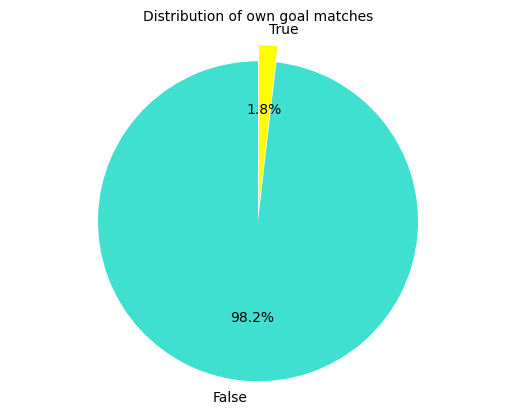

In [ ]:
goals = df_goalscorers['own_goal'].value_counts()
plt.pie(goals.values, labels= goals.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['turquoise', 'yellow'])
plt.title('Distribution of own goal matches', size=10)
plt.axis('equal')
plt.show()

### Spieler

In [ ]:
# Goals scored against favorite opponents by famous goalscoreres
df_scorers = df_goalscorers['scorer'].unique()

In [ ]:
df_goalscorers['opponent'] = df_goalscorers.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = df_goalscorers.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh', 'Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']

top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

# Radar chart
fig = go.Figure()

for player in players:
    player_data = top_players_stats[top_players_stats['scorer'] == player]
    fig.add_trace(go.Scatterpolar(
        r=player_data['goals'],
        theta=player_data['opponent'],
        fill='toself',
        name=player
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(top_players_stats['goals']) + 1]
        )
    ),
    showlegend=True,
    title='Goals scored against favorite opponents by famous goalscorers'
)

fig.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_15648\2620839769.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'


In [ ]:
df_goalscorers['opponent'] = df_goalscorers.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = df_goalscorers.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh','Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']
top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

fig = px.bar(top_players_stats, x='goals',
             y= 'scorer',
             color = 'goals',
             title = 'Goals scored against favorite opponents by famous goalscorers',
             text = 'label',
             orientation = 'h')
            
fig.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_15648\2011534026.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

